# Zomato Data Analysis Using Python

# Step-1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2 Create a dataframe

In [2]:
df= pd.read_csv("Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Convert Data type Column rate

In [4]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handlerate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## What type of resturant do the majority of cystomers order from ?

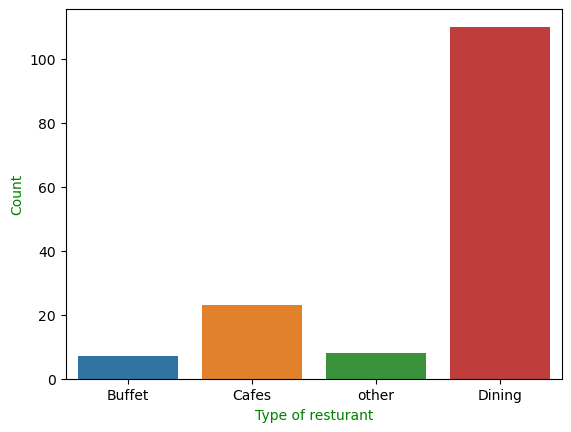

In [8]:
sns.countplot(x=df ['listed_in(type)'])
plt.xlabel("Type of resturant", c='green')
plt.ylabel("Count", c='green')
plt.show()

### Conslusion - Majority of resturant falls in dinning category

## How many votes has each type of resturants have received ?

Text(0, 0.5, 'Votes')

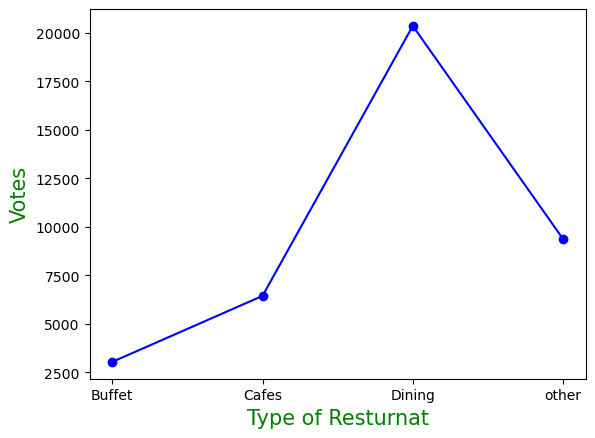

In [10]:
group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result, c='blue', marker='o')
plt.xlabel("Type of Resturnat", c='green', size=15)
plt.ylabel("Votes", c='green', size=15)

### Conclusion : Dinning Resturant has received Maximum votes

## What are the rating that majority of resturnt have received ?

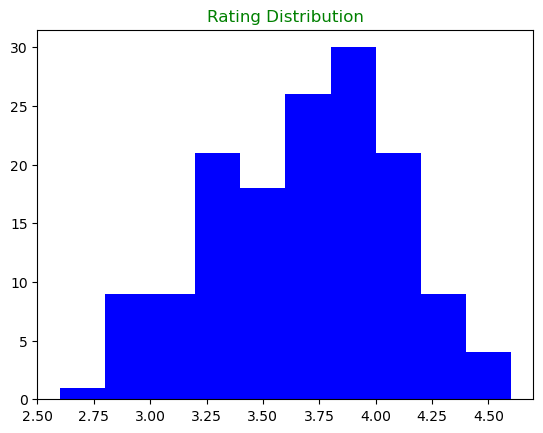

In [11]:
plt.hist(df['rate'], bins=10, color='blue')
plt.title("Rating Distribution", c='green')
plt.show()

 ### Conclusion: The majority resturant received ratings from 3.5 to 4 -->

## Zomoto has observed that most of couple order most of their foods online. What is their average Spending on each other ?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

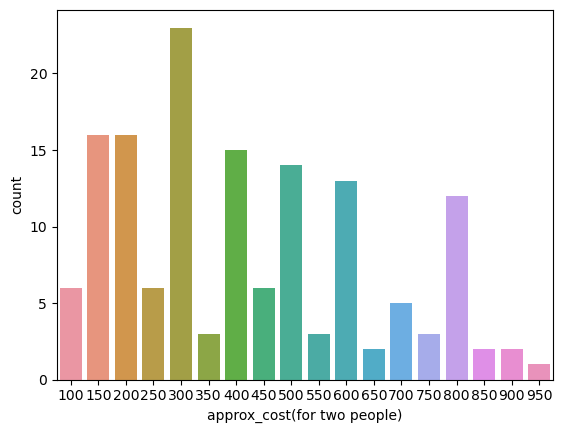

In [13]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conslusion : The majority of couple prefered resturnat with an appxorimate cost of rs. 300/-

## Which mode(Online/offline) has received Maximum rating ?

<Axes: xlabel='online_order', ylabel='rate'>

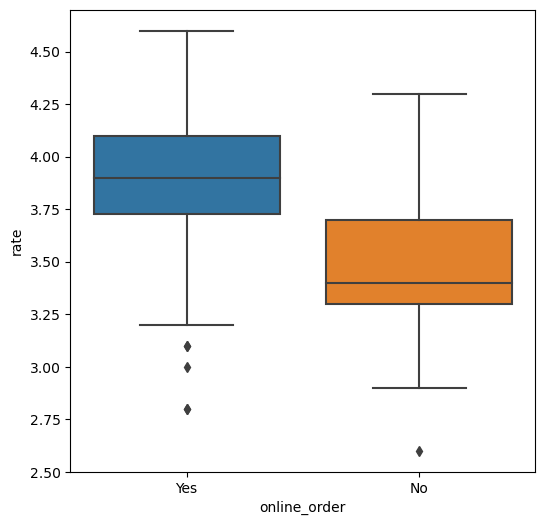

In [16]:
plt.figure (figsize= (6,6))
sns.boxplot(x='online_order', y='rate', data=df)

###  Conclusion : Offline order received lawer rating in comperision to online order.

## Which type of resturnat received more offline orders, so that zomoto can provide those customers with some good offers ?

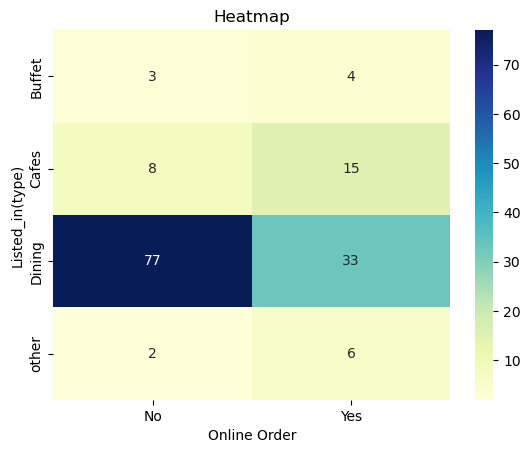

In [22]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table , annot = True, cmap= "YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed_in(type)")
plt.show()

### Conclusion :Dinning resturnat primarily accept offline orders, whearas cafes primarily receive online orders . This suggest that client prefered orders in person at resturant, but prefer online ordering at cafes.